In [1]:
# Purpose for clustering in this data set is to create a basket of pharmaceutical companiess
# with similar stock attributes

In [2]:
# Read and preprocess the data
# import libraries

import pandas as pd

# Read data file into a variable
pharm = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/Pharmaceuticals.csv')

In [3]:
# Take a sneak peek
pharm.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [4]:
# Take a look at the data types in the data. For clustering, only utilize numerical data types
pharm.dtypes

Symbol                    object
Name                      object
Market_Cap               float64
Beta                     float64
PE_Ratio                 float64
ROE                      float64
ROA                      float64
Asset_Turnover           float64
Leverage                 float64
Rev_Growth               float64
Net_Profit_Margin        float64
Median_Recommendation     object
Location                  object
Exchange                  object
dtype: object

In [33]:
# Define variable x with only applicable columns
x = pharm.iloc[:,2:11].values
x

array([[ 6.8440e+01,  3.2000e-01,  2.4700e+01,  2.6400e+01,  1.1800e+01,
         7.0000e-01,  4.2000e-01,  7.5400e+00,  1.6100e+01],
       [ 7.5800e+00,  4.1000e-01,  8.2500e+01,  1.2900e+01,  5.5000e+00,
         9.0000e-01,  6.0000e-01,  9.1600e+00,  5.5000e+00],
       [ 6.3000e+00,  4.6000e-01,  2.0700e+01,  1.4900e+01,  7.8000e+00,
         9.0000e-01,  2.7000e-01,  7.0500e+00,  1.1200e+01],
       [ 6.7630e+01,  5.2000e-01,  2.1500e+01,  2.7400e+01,  1.5400e+01,
         9.0000e-01,  0.0000e+00,  1.5000e+01,  1.8000e+01],
       [ 4.7160e+01,  3.2000e-01,  2.0100e+01,  2.1800e+01,  7.5000e+00,
         6.0000e-01,  3.4000e-01,  2.6810e+01,  1.2900e+01],
       [ 1.6900e+01,  1.1100e+00,  2.7900e+01,  3.9000e+00,  1.4000e+00,
         6.0000e-01,  0.0000e+00, -3.1700e+00,  2.6000e+00],
       [ 5.1330e+01,  5.0000e-01,  1.3900e+01,  3.4800e+01,  1.5100e+01,
         9.0000e-01,  5.7000e-01,  2.7000e+00,  2.0600e+01],
       [ 4.1000e-01,  8.5000e-01,  2.6000e+01,  2.4100e+01,  4

In [34]:
# Standardize features
# Standardize numerical features to make it easy to group the values. Make them have 
# the same max/min
from sklearn.preprocessing import StandardScaler

# Create scaler. StandardScaler is a function that standardizes values
scaler = StandardScaler()
# Apply the scaler. 
pharm_std = scaler.fit_transform(x)
pharm_std

array([[ 1.88642282e-01, -8.21040576e-01, -4.78668159e-02,
         4.10803822e-02,  2.47578717e-01, -5.24754233e-16,
        -2.17335702e-01, -5.40800775e-01,  6.32054993e-02],
       [-8.75518007e-01, -4.61835324e-01,  3.58342950e+00,
        -8.75950197e-01, -9.65556995e-01,  9.45313187e-01,
         1.87358364e-02, -3.90551348e-01, -1.59203499e+00],
       [-8.97899295e-01, -2.62276851e-01, -2.99167599e-01,
        -7.40093815e-01, -5.22666180e-01,  9.45313187e-01,
        -4.14061984e-01, -5.86246589e-01, -7.01952839e-01],
       [ 1.74479124e-01, -2.28066827e-02, -2.48907443e-01,
         1.09008573e-01,  9.40799124e-01,  9.45313187e-01,
        -7.68169291e-01,  1.51088563e-01,  3.59899549e-01],
       [-1.83446626e-01, -8.21040576e-01, -3.36862717e-01,
        -2.71389297e-01, -5.80434547e-01, -4.72656593e-01,
        -3.22256386e-01,  1.24642544e+00, -4.36489742e-01],
       [-7.12554256e-01,  2.33198330e+00,  1.53173811e-01,
        -1.48730392e+00, -1.75505801e+00, -4.726565

In [35]:
# Perform k-means cluster analysis
# Import kmeans library

from sklearn.cluster import KMeans
# utilize elbow method to find the optimal k
# initialize within cluster sum of squared error to estimate optimal k
wcss = []
# run for loop to iterate between various values of k (in this case up to 11)
for i in range(1,8):
    # initiate parameter determines how centroids are determined
    # n_init = number of independent runs
    # max iter = maximum number of iterations for each run
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init=10,random_state = 0)
    # use the identified value for k to fit the scaled/transformed dataset
    kmeans.fit(pharm_std)
    # Append resulting within cluster sse to wcss matrix
    wcss.append(kmeans.inertia_)

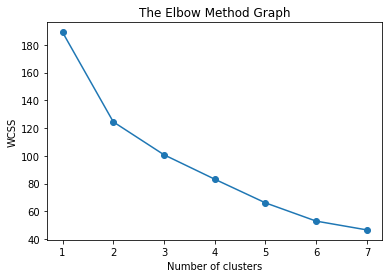

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1,8),wcss, marker = "o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# From above graph, optimal number of k is 2 (point at which graph begins to decrease in 
# linear fashion)

# Now we can perform k means cluster analysis using 2 clusters
km = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, 
            random_state = 0).fit(pharm_std)


In [38]:
# Assign data points to clusters
# fit_predict assigns the datapoints in the data set to each cluster 
clusters = km.fit_predict(pharm_std)

# Display clusters array
clusters

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int32)

In [39]:
# Create a new column called 'Label' to save clusters in the dataset
pharm['label'] = clusters
pharm.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,label
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,0
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE,1
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE,1
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE,0
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,1


In [41]:
# Interpret and visualize the clusters
# Interpret and visualize the clusters

# create a dataframe to save the centroids for the clusters 

# km.cluster_centers -> centroid location. 
# Columns identifies the name of the columns in the dataframe

centroids = pd.DataFrame(km.cluster_centers_,columns = ['Market_Cap','Beta', 'PE_Ratio', 'ROE',
                                                       'ROA','Asset_Turnover', 'Leverage', 
                                                       'Rev_Growth', 'Net_Profit_Margin'])
centroids

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,0.690012,-0.367499,-0.283176,0.672813,0.855022,0.472657,-0.341333,-0.297383,0.699181
1,-0.759013,0.404248,0.311493,-0.740094,-0.940524,-0.519922,0.375466,0.327122,-0.769099


In [42]:
# Add a new column called 'cluster' to indicate the index of the clusters for each set of 
# the centroids

centroids ['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster
0,0.690012,-0.367499,-0.283176,0.672813,0.855022,0.472657,-0.341333,-0.297383,0.699181,Cluster 0
1,-0.759013,0.404248,0.311493,-0.740094,-0.940524,-0.519922,0.375466,0.327122,-0.769099,Cluster 1


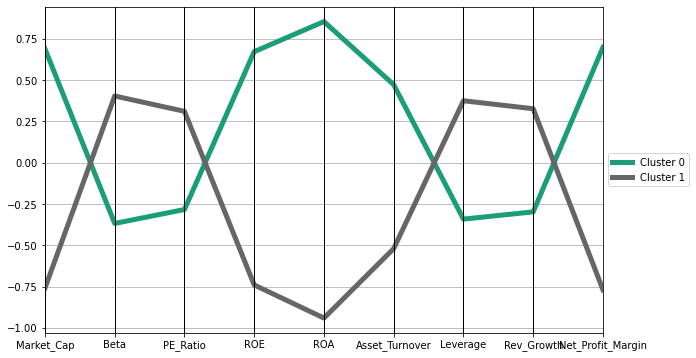

In [43]:
# Create parallel coordinates to visualize the centroids for each cluster

# import library
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# parallel coordinates visusalization. This shows us visually how the clusters are differentiated

plt.figure(figsize = (10,6))
parallel_coordinates(centroids,class_column = 'Cluster', colormap = 'Dark2', linewidth =5)
plt.legend(loc='center left', bbox_to_anchor = (1,0.5))



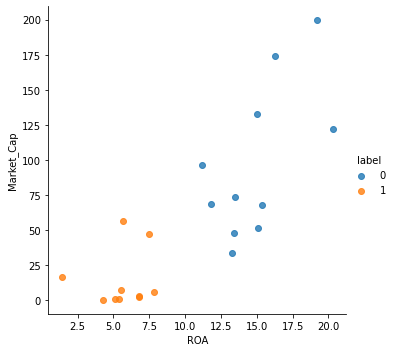

In [46]:
# Visualize the clusters using two variables 
# Create scatter plot
# fit_reg is false so regression lines are not drawn
import seaborn as sns
sns.lmplot(data = pharm, x = 'ROA', y = 'Market_Cap', hue = 'label',
          fit_reg = False, legend = True)

In [45]:
pharm

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,label
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,0
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE,1
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE,1
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE,0
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,1
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE,1
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE,0
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ,1
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE,1
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE,0
